In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import subprocess
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
#Abrimos el csv con los datos
datos_partidos = pd.read_csv('../data/nba_2016_scores_caracteristicas.csv',header=None)
cantidad_equipos = 30
partidos_totales = 1002

In [3]:
#Cambio nombres de las columnas para que sean lo que representan
datos_partidos.rename(columns={0:'Equipo 1',1:'Puntos equipo 1',2:'Equipo 2',3:'Puntos equipo 2'}, inplace=True)

In [4]:
#Me guardo la cantidad de partidos que jugo cada equipo
partidos_por_equipo = []
for i in range(30): partidos_por_equipo.append(0)

for i in datos_partidos.index:
    partidos_por_equipo[datos_partidos['Equipo 1'][i]-1] += 1
    partidos_por_equipo[datos_partidos['Equipo 2'][i]-1] += 1

#Muestro el promedio de partidos jugados por equipo
sum(partidos_por_equipo)/cantidad_equipos

66.8

In [5]:
#Muestro la mediana la mediana
np.median(partidos_por_equipo)

67.0

In [6]:
#Guardo los puntos totales que anoto cada equipo
puntos_por_equipo = []
for i in range(30): puntos_por_equipo.append(0)

for i in datos_partidos.index:
    puntos_por_equipo[datos_partidos['Equipo 1'][i]-1] += datos_partidos['Puntos equipo 1'][i]
    puntos_por_equipo[datos_partidos['Equipo 2'][i]-1] += datos_partidos['Puntos equipo 2'][i]

In [7]:
#Guardo las victorias totales de cada equipo
victorias_por_equipo = []
for i in range(30):
    victorias_por_equipo.append(0)

for i in datos_partidos.index:
    if(datos_partidos['Puntos equipo 1'][i] > datos_partidos['Puntos equipo 2'][i]):
        victorias_por_equipo[datos_partidos['Equipo 1'][i] - 1] += 1
    else:
        victorias_por_equipo[datos_partidos['Equipo 2'][i] - 1] += 1

In [9]:
#Imprimo el coeficiente de correlacion entre las victorias de un equipo y la cantidad de puntos anotados
np.corrcoef(victorias_por_equipo, puntos_por_equipo)[0][1]

0.6104280240868951

In [10]:
#Imprimo el percentil 85
np.percentile(victorias_por_equipo,85)

43.949999999999996

(array([1., 1., 2., 2., 5., 6., 7., 1., 3., 0., 2.]),
 array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]),
 <a list of 11 Patch objects>)

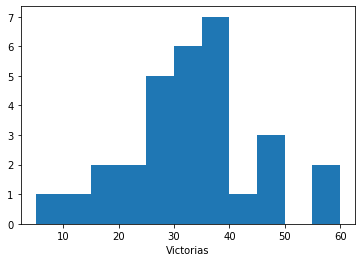

In [11]:
#Hacemos un histograma
plt.xlabel('Victorias')
plt.hist(victorias_por_equipo, bins=range(5,61,5))

In [51]:
#Creamos el DataFrame
victorias_por_equipo_df = pd.DataFrame(victorias_por_equipo)
#Renombramos la columna
victorias_por_equipo_df.rename(columns={0: 'Cantidad de victorias'},inplace=True)
#Abrimos el csv que contiene los nombres de equipo
nombres_equipos = pd.read_csv('../data/nba_2016_teams.csv')
#Renombramos los index para que cada equipo quede asociado a su ranking
victorias_por_equipo_df.rename(index=lambda x: nombres_equipos.iloc[x,1],inplace=True)
victorias_por_equipo_df.reset_index(inplace=True)
victorias_por_equipo_df.rename(columns={'index':'Equipo'},inplace=True)
#Victorias Chicago, Victorias Portland
print('Victorias Chicago:',victorias_por_equipo_df['Cantidad de victorias'][4], ', Victorias Portland:',victorias_por_equipo_df['Cantidad de victorias'][24])
print('Victorias Phoenix:',victorias_por_equipo_df['Cantidad de victorias'][23], ', Victorias Brooklyn:',victorias_por_equipo_df['Cantidad de victorias'][2])

Victorias Chicago: 33 , Victorias Portland: 35
Victorias Phoenix: 18 , Victorias Brooklyn: 19
